<a href="https://colab.research.google.com/github/mrhallonline/NLP-Workshop/blob/main/Workshop_Premodule_Template_Natural_Language_Toolkit_(NLTK)_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.0 Introduction (15 minutes)**
* Brief about NLP, NLTK, and its relevance in educational research.
* Discussion on how analyzing text from classes can provide insights into pedagogy, student engagement, understanding, etc.


# 2.0 Setting Up (10 minutes)

* 2.1 Installing necessary libraries: primarily NLTK.
* 2.2 How to set up a Google Colab notebook.

#Similar in usage to RStudio allowing you to tun chunks or cells at a time. Normally flow from top to bottom

## 2.1 Installing NLTK dependencies and libraries

1. NLTK
2.   [Matplotlib](https://matplotlib.org/) library: Library for creating data visualizations.
3.   [Beautiful Soup](https://pypi.org/project/beautifulsoup4/) library: Pulls information from HTML and XML files.
4.   [Gensim](https://pypi.org/project/gensim/) library: Natural language processing tool
5.   [PyPDF2](https://pypdf2.readthedocs.io/en/3.0.0/index.html#) library: NLTK normally works with text files, PyPDF2 will allow you to read, write, convert to text, and merge pdf files
6. Numpy
7. SciPy
8. Pandas
9. Scikit
10. Autocorrect


In [ ]:
!pip install nltk
!pip install matplotlib
!pip install beautifulsoup4
!pip install gensim
!pip install PyPDF2
!pip install numpy
!pip install scipy
!pip install pandas

# 2.2 Importing NLTK and popular corpora

In [ ]:
import nltk
nltk.download('popular')

## 2.3 Connecting/Mounting your Google drive to be accessible in Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2.4 Import data corpus to your Google Drive current folder.
This is needed to occur in order to use the same data. The cell will download the text file and save it in your Google Drive so it can be accessed by this Colab document. You can use this same code to download any file that you have sharing access with, just change the file_id with the new one.

In [ ]:
import requests

# This is the full shared Drive link,
#https://docs.google.com/spreadsheets/d/1iJ4SG-QXfY4zw5K9B7Ununv3rb3iBj8S/edit?usp=drive_link&ouid=106477043869312333876&rtpof=true&sd=true

# get the file ID from the shareable link and paste below
file_id = "1iJ4SG-QXfY4zw5K9B7Ununv3rb3iBj8S"

# construct the download URL
download_url = f"https://docs.google.com/uc?export=download&id={file_id}"

# send a GET request to the download URL and save the response content
response = requests.get(download_url)

# The next line names the file after download. If you change it here, you will also need to change in the subsequent fields.
with open("uncertaintyText.xlsx", "wb") as f:
    f.write(response.content)

# 2.6 Working with csv Files

In [ ]:
!pip install pandas openpyxl nltk

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Specify the path to the Excel file
excel_file_path = '/content/uncertaintyText.xlsx'

# Specify the column name you want to tokenize
column_name = 'transcript'

# Read the Excel file and extract the specified column
data = pd.read_excel(excel_file_path, engine='openpyxl')
text_column = data[column_name]


# Convert each item in the column to a string and then join them
raw_uncertaintyText = ' '.join(map(str, text_column))
print(raw_uncertaintyText[0:250])

# Save the string to a text file in your Google Drive
#with open('/content/drive/MyDrive/raw_uncertaintyText.txt', 'w') as file:
#  file.write(raw_uncertaintyText)

#print("Text saved to raw_uncertaintyText.txt")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


It's table 6, right? I think so. Always go with basic assumptions. Unless it's about someone in that case, don't. Eric. Yes. I've been sitting with you. Don't like it because we're right in front of Ms. Fletcher. But it's okay. You can live with it. 


# 2.7 Working with Text Files
Text files can be used directly and don't need to be converted in order to be imported into NLTK. Many other file types, other than raw text and downloaded corpora, will need to be first initially converted to text files in order to be used in our NLTK data flow

In [ ]:
# load data from existing text file
filename = '/content/uncertaintyText.txt'
uncertaintyText = open(filename, 'rt', encoding='utf-8', errors='replace')

raw_uncertaintyText = uncertaintyText.read()
uncertaintyText.close()


FileNotFoundError: ignored

In [ ]:
print(type(raw_uncertaintyText))
print(len(raw_uncertaintyText))
print(raw_uncertaintyText[0:200])
print(raw_uncertaintyText[66000:66216])

<class 'str'>
66207
It's table 6, right? I think so. Always go with basic assumptions. Unless it's about someone in that case, don't. Eric. Yes. I've been sitting with you. Don't like it because we're right in front of M
year. Alright. We never do that. This year isn't as bad as last year. No, it's not. And I attribute it mostly to the fact that it's just a little bit of a mess. It's so tiny. I always have to pick things up.


# 3.0 Basics of Text Preprocessing
* 3.1 Tokenization
* 3.2 Stop words removal
* 3.3 Stemming
* 3.4 Lemmatizing

# 3.1a Tokenize data corpus

In [ ]:
import nltk
nltk.download('punkt')

text_tokens = raw_uncertaintyText

# Word Tokenization
text_wordTokens = nltk.word_tokenize(text_tokens)

# Sentence Tokenization
text_sentTokens = nltk.sent_tokenize(text_tokens)

# Convert the tokens to an nltk.Text object
text_Objects = nltk.Text(text_wordTokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 3.1b Regex Tokenization

In [ ]:
# Regular expression tokenizing Gaps =False
pattern = r'\w+'
text_regexTokensWT = nltk.regexp_tokenize(text_tokens, pattern, gaps=True)

#Regex Gaps=True
pattern = r'\w+'
text_regexTokensWF = nltk.regexp_tokenize(text_tokens, pattern, gaps=False)

# Regular expression tokenizing Gaps =False
pattern = r'\s+'
text_regexTokensST = nltk.regexp_tokenize(text_tokens, pattern, gaps=True)

#Regex Gaps=True
pattern = r'\s+'
text_regexTokensSF = nltk.regexp_tokenize(text_tokens, pattern, gaps=False)

#Words with capital letters
pattern3 = r'[A-Z]\w+'
text_regexTokensCAPS = nltk.regexp_tokenize(text_tokens, pattern3)

print("Length =", len(text_regexTokensWT)," Characters", text_regexTokensWT[0:200])
print("Length =", len(text_regexTokensWF)," Characters", text_regexTokensWF[0:200])
print("Length =", len(text_regexTokensST)," Characters", text_regexTokensST[0:200])
print("Length =", len(text_regexTokensSF)," Characters", text_regexTokensSF[0:200])
print("Length =", len(text_regexTokensCAPS)," Characters", text_regexTokensCAPS[0:200])

Length = 14040  Characters ["'", ' ', ' ', ', ', '? ', ' ', ' ', '. ', ' ', ' ', ' ', ' ', '. ', ' ', "'", ' ', ' ', ' ', ' ', ' ', ', ', "'", '. ', '. ', '. ', "'", ' ', ' ', ' ', ' ', '. ', "'", ' ', ' ', ' ', ' ', "'", ' ', ' ', ' ', ' ', ' ', '. ', '. ', ' ', "'", ' ', '. ', ' ', ' ', ' ', ' ', '. ', ' ', '... ', ' ', ' ', ' ', ' ', '? ', '. ', "'", ' ', ' ', ' ', '. ', ' ', ', ', ' ', ' ', '. ', "'", ' ', ' ', ' ', ' ', "'", ' ', ' ', ' ', ' ', ' ', ' ', ' ', '. ', ', ', ' ', '. ', "'", ' ', '. ', ' ', "'", ' ', ' ', ' ', '. ', ' ', ' ', ' ', '. ', ' ', ' ', '? ', ' ', ' ', "'", ' ', ' ', '. ', ' ', ' ', "'", ' ', ' ', '. ', ', ', ' ', ' ', ' ', ' ', ' ', ' ', '? ', "'", ' ', ' ', ' ', '. ', ' ', '. ', ' ', ' ', ' ', ' ', ' ', ' ', '? ', '... ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '. ', ' ', ' ', ' ', '. ', ' ', ' ', ', ', '. ', ' ', ' ', ' ', "'", ' ', '. ', ' ', ' ', "'", ' ', ' ', '. ', ' ', '? ', "'", ' ', ' ', ' ', ' ', '. ', ' ', ' ', ' ', ' ', '. ', "'", ' ', ' ', 

In [ ]:
# Convert the list to a set to get unique words, then sort it
unique_sorted_words = sorted(set(text_regexTokensCAPS))

# Save the sorted unique words to a text file in your Google Drive, with each word on a new line
with open('/content/drive/MyDrive/text_regexTokensCAPS.txt', 'w') as file:
    for word in unique_sorted_words:
        file.write("%s\n" % word)

print("Text saved to text_regexTokensCAPS.txt")


Text saved to text_regexTokensCAPS.txt


In [ ]:
#What types of variables are these
print(type(raw_uncertaintyText))
print(type(text_tokens))
print(type(text_wordTokens))
print(type(text_sentTokens))
print(type(text_regexTokensST))
print(type(text_regexTokensSF))
print(type(text_Objects))

<class 'str'>
<class 'str'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'nltk.text.Text'>


In [ ]:
print(len(raw_uncertaintyText))
print(len(text_tokens))
print(len(text_wordTokens))
print(len(text_sentTokens))
print(len(text_regexTokensST))
print(len(text_Objects))

66216
66216
16770
2023
13119
16770


In [ ]:
#sorted(set(raw_uncertaintyText[0:50]))
len(text_tokens)
sorted(set(text_wordTokens[0:50]))
sorted(set(text_sentTokens[0:50]))
#sorted(set(text_Objects[0:50]))

['Always go with basic assumptions.',
 'But is this a last minute test?',
 "But it's okay.",
 'Did it really?',
 'Did you... did you do the search?',
 "Don't like it because we're right in front of Ms. Ronkel.",
 'Excellent.',
 'Have you read it?',
 'Henry.',
 'I know, I found out.',
 'I love that book.',
 'I mean, no.',
 'I think so.',
 "I think you're really interesting.",
 'I thought it was going to take like 15 minutes.',
 "I'm so mad because we're not going to be here next class.",
 "I've been sitting with you.",
 'Is it VR America?',
 "It ain't going to nothing.",
 'It has a high school.',
 'It is.',
 'It is?',
 'It took two hours.',
 "It's Athena.",
 "It's a listening test.",
 "It's a math class.",
 "It's about South Side School.",
 "It's amazing.",
 "It's crazy.",
 "It's for next class.",
 "It's okay.",
 "It's table 6, right?",
 'Oh my god, okay.',
 'Oh my god.',
 'Or...',
 "The first part's 50 minutes.",
 'The other class was Ms. Flanagan.',
 "The second part's 60 seconds.",
 

Extract only nouns

In [ ]:
text_regexTokensST_only_nn = [x for (x,y) in pos if y in ('NN')]

freq = nltk.FreqDist(text_regexTokensST_only_nn)
freq

NameError: ignored

In [ ]:
#Combined All in one normalizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# split into word tokens
#from nltk.tokenize import word_tokenize
#word_tokens = word_tokenize(text_file)

# convert to lower case
lower_tokens = [w.lower() for w in text_regexTokensST]

# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in lower_tokens]


# remove remaining tokens that are not alphabetic
alpha_words = [word for word in stripped if word.isalpha()]


# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
code4 = [w for w in alpha_words if not w in stop_words]
print(code4[:100])


['estimated', 'time', 'minutes', 'purpose', 'develop', 'shared', 'understanding', 'norm', 'excellent', 'class', 'homelearning', 'assignment', 'students', 'complete', 'start', 'next', 'class', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'first', 'time', 'talking', 'norms', 'important', 'chart', 'paper', 'enlarged', 'version', 'template', 'students', 'filled', 'use', 'develop', 'initial', 'class', 'consensus', 'model', 'model', 'used', 'driving', 'question', 'board', 'dqb', 'later', 'lesson', 'samples', 'seen', 'later', 'steps', 'teacher', 'guide', 'min', 'min', 'min', 'prepare', 'students', 'develop', 'initial', 'model', 'think', 'different', 'egg', 'hatches', 'chicken', 'egg', 'ever', 'hatch', 'min', 'group', 'size', 'whole', 'class', 'heat', 'enter', 'cup', 'system', 'andor', 'cold', 'leave', 'cup', 'system', 'maybe', 'gases', 'escape', 'system', 'attending', 'equity', 'attending', 'equity', 'dqb', 'provides', 'public']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 4.0 Basic analysis and Analysis (20 minutes)
1. Words/Sentences
  *   Counting/Sorting
  *   Concordance
2. Chunking
3. Data Visualization
  *   plot distribution
3. POS Tagging
4. Parsing

Print list of top 10 items sorted.

In [ ]:
freq = nltk.FreqDist(text_regexTokensST)
print(freq.most_common(5))

[('the', 582), ('to', 426), ('and', 346), ('of', 284), ('a', 201)]


Removing

In [ ]:
freq = nltk.FreqDist(text_regexTokensST)
print(freq.most_common(5))

testfreq = nltk.FreqDist()
print(testfreq.most_common(5))

[('the', 582), ('to', 426), ('and', 346), ('of', 284), ('a', 201)]
[]


In [ ]:
cleanedColumn = nltk.Text(combined_text)

print(type(combined_text))
print(type(cleanedColumn))

cleanedColumn.concordance("student")

<class 'str'>
<class 'nltk.text.Text'>
no matches


compute frequency distribution of words found in the document. Can find most common, least, total count, etc.

In [ ]:
#Top ten most common words
fd = nltk.FreqDist(text_regexTokensST)
fd.most_common(100)

In [ ]:
fd.tabulate(25)

      the        to       and        of         a  students        in        is      that       for     their      will        on        be      they      what      this       how       are        or     about questions      with        an        as 
      582       426       346       284       201       195       193       144       133       119       109        99        75        72        72        69        68        64        63        63        62        60        55        53        52 


Word count

In [ ]:
fd["equal"]

In [ ]:
fd.plot(35, cumulative=True)

In [ ]:
from matplotlib import pyplot as plt
# Create a frequency distribution
#fd = nltk.FreqDist(tokens_nltk_text)

# Get the 10 most common words and their counts
common = fd.most_common(10)

# Unzip the words and counts into two separate lists
words, counts = zip(*common)

# Create a bar graph
plt.bar(words, counts)
plt.show()

NameError: ignored

This displays the total number of individual words left after several rounds of preprocessing. These numbers are good to keep up with as you continue to clean your data.

In [ ]:
len(text_regexTokensST)

The sorted set lists and alphabetizes all words that appear at least once throughout the document. This is another important step in cleaning your data. We can also use other preprocessing methods to shrink this list down such as stemming and lemmatizing.

In [ ]:
sorted(set(text_regexTokensST))

# 4.1 More quick analysis options
1. concordance
2. similar words
3. dispersion plots


In [ ]:
text_Objects.concordance('maybe', lines = 15)

Displaying 15 of 20 matches:
. Ever ? This week . I do n't know , maybe you have to clean some other day . N
d I tell you ? I told you . I said , maybe I do n't know how graphs work . And 
ding y value is negative 15 . Yeah . Maybe you should mark that on there like y
ere like you were about to , because maybe that will help you to think about , 
ow to use it on the test . Okay , so maybe on the next one you will . You can d
gns . Okay . I think , though , that maybe you guys are still a little confused
nus 4.6 would be minus 6 . Yeah . So maybe if I do this- I know it 's not reall
. 1.48 . I have no idea . Actually , maybe 1.38 ? 1.39 . 3.9 . According to her
uestions . Are there any questions ? Maybe you should ask if anyone did it diff
to us talk about jobs . It 's okay . Maybe they can find us a job . I need a jo
lot of journals , so I do n't know . Maybe I can get a freshman to do it for me
st question ? Just 2.5 points . Oh . Maybe there 's a project involved . Wow . 
rying to fi

In [ ]:
text_Objects.similar("students")

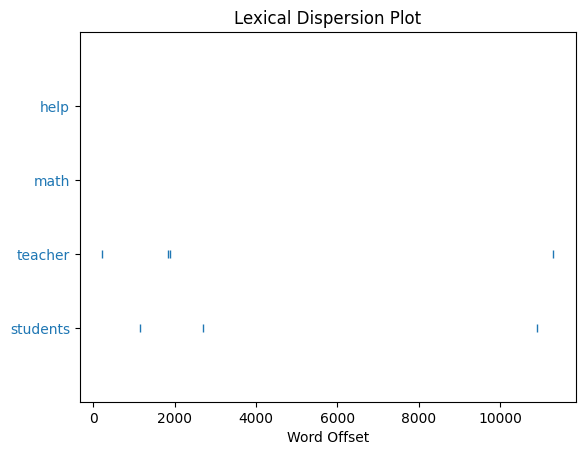

In [ ]:
text_Objects.dispersion_plot(["students","teacher", "math", "help"])

# 4.2 n-grams and colocations
1. bigrams
2. trigrams


In [ ]:
Educative_bigrams = list(nltk.bigrams(text_Objects))
Educative_bigrams

[('It', "'s"),
 ("'s", 'table'),
 ('table', '6'),
 ('6', ','),
 (',', 'right'),
 ('right', '?'),
 ('?', 'I'),
 ('I', 'think'),
 ('think', 'so'),
 ('so', '.'),
 ('.', 'Always'),
 ('Always', 'go'),
 ('go', 'with'),
 ('with', 'basic'),
 ('basic', 'assumptions'),
 ('assumptions', '.'),
 ('.', 'Unless'),
 ('Unless', 'it'),
 ('it', "'s"),
 ("'s", 'about'),
 ('about', 'someone'),
 ('someone', 'in'),
 ('in', 'that'),
 ('that', 'case'),
 ('case', ','),
 (',', 'do'),
 ('do', "n't"),
 ("n't", '.'),
 ('.', 'Henry'),
 ('Henry', '.'),
 ('.', 'Yes'),
 ('Yes', '.'),
 ('.', 'I'),
 ('I', "'ve"),
 ("'ve", 'been'),
 ('been', 'sitting'),
 ('sitting', 'with'),
 ('with', 'you'),
 ('you', '.'),
 ('.', 'Do'),
 ('Do', "n't"),
 ("n't", 'like'),
 ('like', 'it'),
 ('it', 'because'),
 ('because', 'we'),
 ('we', "'re"),
 ("'re", 'right'),
 ('right', 'in'),
 ('in', 'front'),
 ('front', 'of'),
 ('of', 'Ms.'),
 ('Ms.', 'Ronkel'),
 ('Ronkel', '.'),
 ('.', 'But'),
 ('But', 'it'),
 ('it', "'s"),
 ("'s", 'okay'),
 ('okay',

In [ ]:
Educative_trigrams = list(nltk.trigrams(text_Objects))
Educative_trigrams

[('It', "'s", 'table'),
 ("'s", 'table', '6'),
 ('table', '6', ','),
 ('6', ',', 'right'),
 (',', 'right', '?'),
 ('right', '?', 'I'),
 ('?', 'I', 'think'),
 ('I', 'think', 'so'),
 ('think', 'so', '.'),
 ('so', '.', 'Always'),
 ('.', 'Always', 'go'),
 ('Always', 'go', 'with'),
 ('go', 'with', 'basic'),
 ('with', 'basic', 'assumptions'),
 ('basic', 'assumptions', '.'),
 ('assumptions', '.', 'Unless'),
 ('.', 'Unless', 'it'),
 ('Unless', 'it', "'s"),
 ('it', "'s", 'about'),
 ("'s", 'about', 'someone'),
 ('about', 'someone', 'in'),
 ('someone', 'in', 'that'),
 ('in', 'that', 'case'),
 ('that', 'case', ','),
 ('case', ',', 'do'),
 (',', 'do', "n't"),
 ('do', "n't", '.'),
 ("n't", '.', 'Henry'),
 ('.', 'Henry', '.'),
 ('Henry', '.', 'Yes'),
 ('.', 'Yes', '.'),
 ('Yes', '.', 'I'),
 ('.', 'I', "'ve"),
 ('I', "'ve", 'been'),
 ("'ve", 'been', 'sitting'),
 ('been', 'sitting', 'with'),
 ('sitting', 'with', 'you'),
 ('with', 'you', '.'),
 ('you', '.', 'Do'),
 ('.', 'Do', "n't"),
 ('Do', "n't", 'li

In [ ]:
finder = nltk.collocations.BigramCollocationFinder.from_words(text_Objects)
finder.ngram_fd.tabulate(25)

          ('of', 'the')           ('in', 'the')            (',', 'and')      ('students', 'to')         ('the', 'unit')           ('.', 'This')            ('min', ']')              ('’', 's')           ('unit', '.')           ('to', 'the')             ('.', 'We')          ('and', 'the')          ('need', 'to')          ('will', 'be')        ('the', 'class')    ('students', 'will')             ('in', 'a')       ('to', 'explain')          ('for', 'the') ('Driving', 'Question')   ('Question', 'Board')           ('10', 'min')              ('’', 't')       (',', 'students')              ('.', '●') 
                     95                      59                      46                      39                      39                      33                      32                      25                      24                      24                      24                      22                      22                      21                      21                      21                

In [ ]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(text_Objects)
finder.ngram_fd.tabulate(25)

('Driving', 'Question', 'Board')             ('the', 'unit', '.')           ('parts', 'of', 'the')            ('of', 'the', 'unit')         ('✱', 'ATTENDING', 'TO')    ('ATTENDING', 'TO', 'EQUITY') ('or', 'virtual', 'replacement')              ('.', 'This', 'is')                ('min', ']', '[')        ('is', 'important', 'to')                ('don', '’', 't')              ('.', 'We', 'will')           ('(', 'or', 'virtual')  ('virtual', 'replacement', ')')               ('10', 'min', ']')        ('for', 'students', 'to')          ('of', 'the', 'system')          ('to', 'figure', 'out')          ('the', 'fancy', 'cup')        ('the', 'regular', 'cup')  ('the', 'COVID-19', 'pandemic')             ('the', 'unit', ',')        ('.', 'Students', 'will')        (',', 'students', 'will')               ('[', '10', 'min') 
                              19                               17                               15                               14                               11          

In [ ]:
from nltk.util import ngrams

n_value = 4  # Change this for different n values
fourgrams = ngrams(text_Objects, n_value)

# Tabulate the top n-grams
fdist = nltk.FreqDist(fourgrams)
fdist.tabulate(25)  # Top 10 fourgrams


      ('I', 'do', "n't", 'know')          ('.', 'I', 'do', "n't")       ('I', "'m", 'going', 'to')          ('?', 'I', 'do', "n't")       ('do', "n't", 'know', '.')          ('to', 'do', 'it', '.')        ('.', 'It', "'s", 'like') ('this', 'plus', 'this', 'plus') ('plus', 'this', 'plus', 'this')       ('I', 'do', "n't", 'want')      ('do', "n't", 'want', 'to')          ('.', 'Yeah', ',', 'I')     ('do', "n't", 'know', 'how')     ("n't", 'know', 'how', 'to')      ('know', 'how', 'to', 'do')         ('.', 'I', 'did', "n't")        ('.', 'How', 'do', 'you')        ('.', 'I', "'m", 'going')    ('do', "n't", 'know', 'what')          ('.', 'Oh', ',', 'you')     ('you', "'re", 'right', '.')           (',', 'no', ',', 'no')          ('.', 'I', 'ca', "n't")          ('.', 'It', "'s", 'so')          (',', 'I', 'do', "n't") 
                              43                               37                               25                               23                               21          

In [ ]:
cleanedTeacher1Transcript.common_contexts(["students", "ask"])

No common contexts were found


# 5.0 Activity
* Provide participants with a sample transcribed text from a middle school math class.
* Let them identify:
** Common themes or topics discussed.
** Questions posed by students indicating uncertainty (using the words we discussed earlier like "maybe", "think" etc.).
** Any specific theories, tools, or names that are frequently mentioned.
* Discuss the findings as a group.

# 6.0 Potential Pitfalls & Ethical Considerations (10 minutes)

* Discuss the challenges of NLP and potential misinterpretations.
* Emphasize the importance of context in qualitative research and how NLP can only aid, not replace, human analysis.
* Talk about ethical considerations, especially if analyzing students' data.
* Stress the importance of taking these analyses in the broader context of classroom dynamics, pedagogical approaches, and individual student backgrounds. Machine analysis can offer insights but can't replace the nuanced understanding of an educator.
* Discuss ethical considerations, especially consent when analyzing student discussions and potential implications of the findings.
* The key is to use NLTK and Python as tools to augment qualitative analysis, not replace it. They can help identify patterns or areas of interest, but the rich, nuanced understanding and interpretation will come from the qualitative researcher’s expertise.

# 7.0 Conclusion and Q&A ( minutes)

3. Tracking Uncertainty Over Time
If you have a series of transcribed sessions, show how to track the use of uncertainty words over time. This can help see if students' uncertainty diminishes or changes character as they progress.
4. Topic Modeling Around Uncertainty
Introduce the concept of topic modeling (like Latent Dirichlet Allocation). You can show how to find out what topics or subject matters are most associated with expressions of uncertainty.
python


```
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
```

Using this approach, you can pinpoint areas or concepts in math that are generating the most uncertainty among students.
5. Sentiment Analysis
Sentiment analysis can be introduced as a tool to gauge the sentiment or emotion behind the uncertainty expressions. This can be a bit complex, but it could be worth touching upon, even if just conceptually.
6. Hands-on Activity
Uncertainty Flow Analysis: Give the students a long discussion and ask them to chart out the flow of uncertainty. Where does it start? How does it evolve? What questions or interventions lead to clarifications?
7. Visualization
Python has a wide range of libraries, like matplotlib, seaborn, or wordcloud, that can be used to visualize the distribution of uncertainty words, their association with certain topics, or their evolution over time.
python
```
import matplotlib.pyplot as plt
from wordcloud import WordCloud
```

# 8.0 Further Usage

Load Uncertainty Words:Load your list of words that denote uncertainty. This list can be stored as a simple Python list.
Load Text Files: Load the content of your three text files.

In [ ]:
uncertainty_words = ["help", "doubt", "difficult", "hard", "equal"]

text_filed = []
text_files_path = ['/content/drive/MyDrive/transcripts/merged/teacher101_merged.txt', '/content/drive/MyDrive/transcripts/merged/teacher102_merged.txt', '/content/drive/MyDrive/transcripts/merged/teacher103_merged.txt']

for file_path in text_files_path:
    with open(file_path, 'r', encoding='utf-8') as file:
        text_filed.append(file.read())
text_filed

Search for Uncertainty Words:
Iterate through the text files and search for the uncertainty words. Count how often each word appears in each file.

In [ ]:
word_frequency_per_file = []

for text in text_filed:
    word_frequency = {}
    for word in uncertainty_words:
        word_frequency[word] = text.lower().count(word.lower())
    word_frequency_per_file.append(word_frequency)


# 10.0 Extra

Print or Analyze Results:
You can now print or analyze the results based on the word frequency per file.

In [ ]:
for i, word_frequency in enumerate(word_frequency_per_file):
    print(f"Results for file {i+1}:")
    for word, frequency in word_frequency.items():
        print(f"{word}: {frequency} occurrences")


Install it using pip install matplotlib. In this code, we use the matplotlib library to create bar plots for each text file, showing the frequency of each uncertainty word. The bar plots are saved as PNG image files with filenames like file_1_word_frequencies.png, file_2_word_frequencies.png, etc. Each plot shows the frequency distribution of uncertainty words in a specific text file.

"maybe","perhaps","unsure","possibly","guess","think","believe","kinda","seem","supposedly","likely","presumably","unclear","doubt"

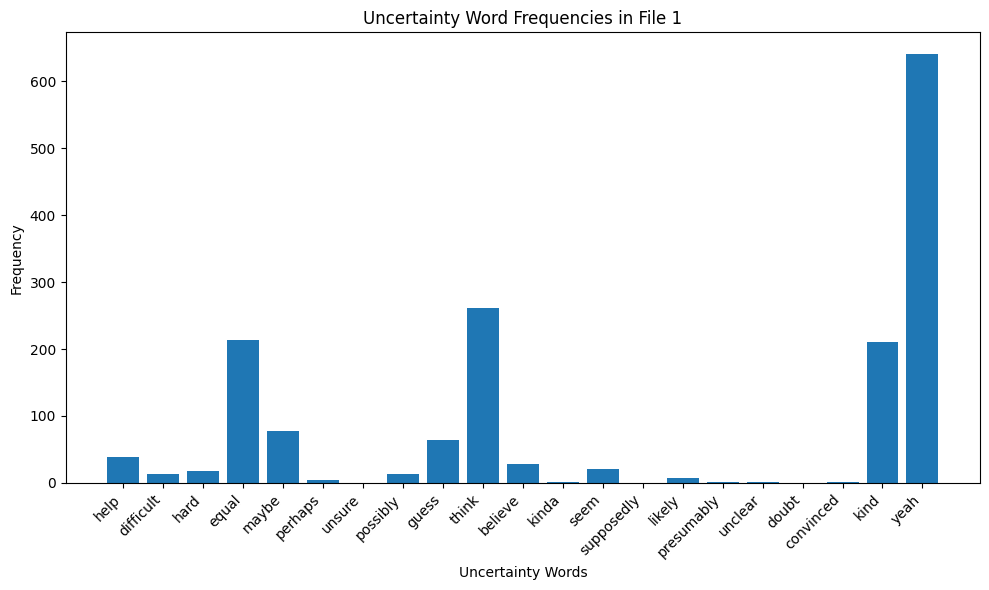

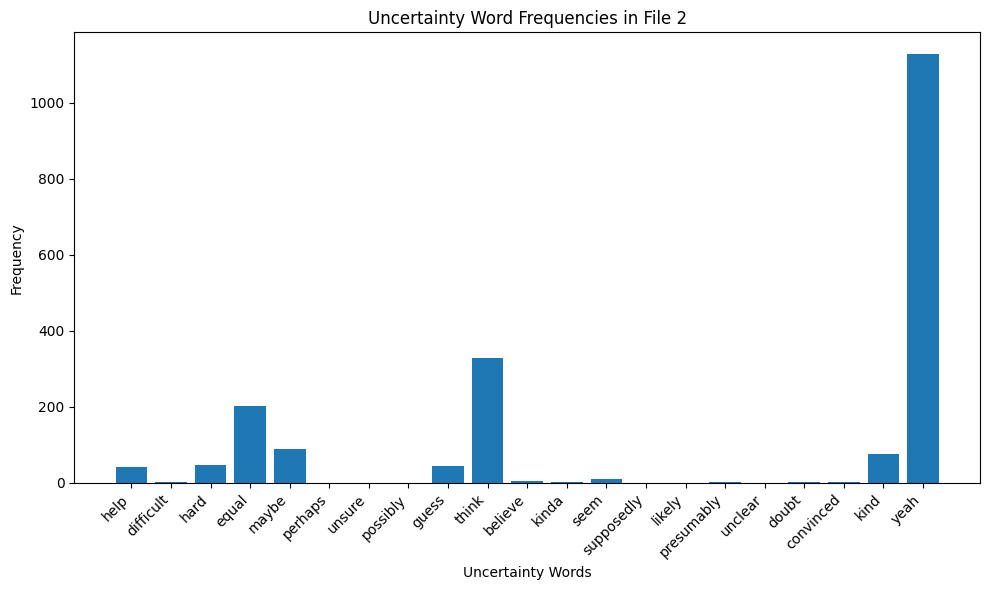

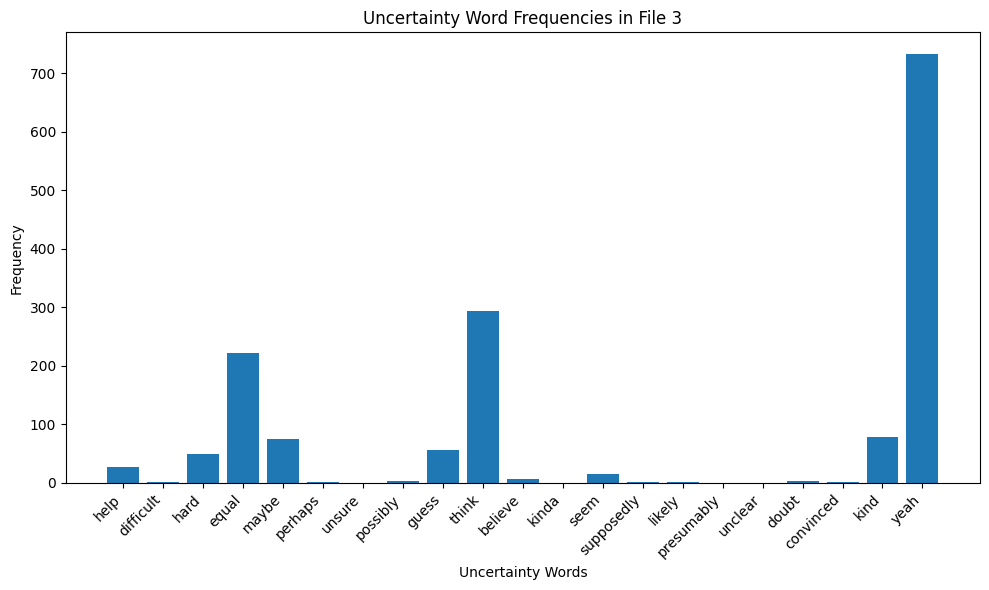

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load uncertainty words
uncertainty_words = ["help", "difficult", "hard", "equal","maybe","perhaps","unsure","possibly","guess","think","believe","kinda","seem","supposedly","likely","presumably","unclear","doubt", "convinced", "kind", "yeah"]

# Load text files
text_files = []
text_files_path = ['/content/drive/MyDrive/transcripts/merged/teacher101_merged.txt', '/content/drive/MyDrive/transcripts/merged/teacher102_merged.txt', '/content/drive/MyDrive/transcripts/merged/teacher103_merged.txt']

for file_path in text_files_path:
    with open(file_path, 'r', encoding='utf-8') as file:
        text_files.append(file.read())

# Search for uncertainty words and count occurrences
word_frequency_per_file = []

for text in text_files:
    word_frequency = {}
    for word in uncertainty_words:
        word_frequency[word] = text.lower().count(word.lower())
    word_frequency_per_file.append(word_frequency)

# Plotting the data
for i, word_frequency in enumerate(word_frequency_per_file):
    words = list(word_frequency.keys())
    frequencies = list(word_frequency.values())

    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies)
    plt.title(f"Uncertainty Word Frequencies in File {i+1}")
    plt.xlabel("Uncertainty Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

    plt.savefig(f'file_{i+1}_word_frequencies.png')
    plt.show()


In [ ]:
# Word Tokens
pattern1 = r'\w+'
text_regexTokens1 = nltk.regexp_tokenize(text_tokens, pattern1)

#Non-Word Tokens
pattern2 = r'\W+'
text_regexTokens2 = nltk.regexp_tokenize(text_tokens, pattern2)

#Words with capital letters
pattern3 = r'[A-Z]\w+'
text_regexTokens3 = nltk.regexp_tokenize(text_tokens, pattern3)

#Sentences
pattern4 = r'[A-Z][^.!?]*[.!?]'
text_regexTokens4 = nltk.regexp_tokenize(text_tokens, pattern4)

#Email Addresses
pattern5 = r'\S+@\S+'
text_regexTokens = nltk.regexp_tokenize(text_tokens, pattern5)

#Digits
pattern6 = r'\d+'
text_regexTokens6 = nltk.regexp_tokenize(text_tokens, pattern6)

#URLs
pattern7 = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
text_regexTokens7 = nltk.regexp_tokenize(text_tokens, pattern7)

#Custom Patterns - Abbreviations with following period
pattern8 = r'\b[A-Za-z]\.(\s)?'
text_regexTokens8 = nltk.regexp_tokenize(text_tokens, pattern8)


#Words with hyphens non-violent
pattern9 = r'\w+(?:-\w+)*'
text_regexTokens9 = nltk.regexp_tokenize(text_tokens, pattern9)


#Contractions (can't, won't)
pattern10 = r'\b\w+\'\w+\b'
text_regexTokens10 = nltk.regexp_tokenize(text_tokens, pattern10)

#Hashtags
pattern11 = r'#\w+'
text_regexTokens11 = nltk.regexp_tokenize(text_tokens, pattern11)


#Custom Pattern- Parenthesized expressions
pattern12 = r'\(.*?\)'
text_regexTokens12 = nltk.regexp_tokenize(text_tokens, pattern12)

#Custom Pattern - Phone number
pattern13 = r'\d{3}-\d{3}-\d{4}'
text_regexTokens13 = nltk.regexp_tokenize(text_tokens, pattern13)